# Tarea 2 - Regresion Polinomial & Feature engineering
## Alvaro Andres Esquivel Gomez - 11002822

### Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 6 de Junio. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from datetime import datetime, date, timedelta
from sklearn.preprocessing import PolynomialFeatures
print(tf.__version__)

2.1.0


In [2]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()
    print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [3]:
#Importando los datos
data = pd.read_csv (r'covid_19_clean_complete.csv')

print(data)


      Province/State         Country/Region        Lat       Long     Date  \
0                NaN            Afghanistan  33.000000  65.000000  1/22/20   
1                NaN                Albania  41.153300  20.168300  1/22/20   
2                NaN                Algeria  28.033900   1.659600  1/22/20   
3                NaN                Andorra  42.506300   1.521800  1/22/20   
4                NaN                 Angola -11.202700  17.873900  1/22/20   
...              ...                    ...        ...        ...      ...   
31530            NaN  Sao Tome and Principe   0.186360   6.613081  5/19/20   
31531            NaN                  Yemen  15.552727  48.516388  5/19/20   
31532            NaN                Comoros -11.645500  43.333300  5/19/20   
31533            NaN             Tajikistan  38.861034  71.276093  5/19/20   
31534            NaN                Lesotho -29.609988  28.233608  5/19/20   

       Confirmed  Deaths  Recovered  
0              0       0 

In [11]:
data_gua = data[data['Country/Region'] == "Guatemala"]
#print(data_gua)
#print(len(data_gua))

numeracion = list(range(0, len(data_gua)))
#print(numeracion)

data_gua['Num_dia'] = numeracion

data_gua.drop(columns = ['Province/State', 'Lat', 'Long'], inplace=True, axis=1)

print(data_gua)

#print(len(data))
#data['Date']
#data.groupby(by="Date")

      Country/Region     Date  Confirmed  Deaths  Recovered  Num_dia
123        Guatemala  1/22/20          0       0          0        0
388        Guatemala  1/23/20          0       0          0        1
653        Guatemala  1/24/20          0       0          0        2
918        Guatemala  1/25/20          0       0          0        3
1183       Guatemala  1/26/20          0       0          0        4
...              ...      ...        ...     ...        ...      ...
30333      Guatemala  5/15/20       1643      30        135      114
30598      Guatemala  5/16/20       1763      33        138      115
30863      Guatemala  5/17/20       1763      33        138      116
31128      Guatemala  5/18/20       1912      35        138      117
31393      Guatemala  5/19/20       2133      43        155      118

[119 rows x 6 columns]


C:\Users\alvar\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\alvar\Anaconda3\envs\tf\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
data_gua.reset_index(drop = True, inplace=True)
print(data_gua)

    Country/Region     Date  Confirmed  Deaths  Recovered  Num_dia
0        Guatemala  1/22/20          0       0          0        0
1        Guatemala  1/23/20          0       0          0        1
2        Guatemala  1/24/20          0       0          0        2
3        Guatemala  1/25/20          0       0          0        3
4        Guatemala  1/26/20          0       0          0        4
..             ...      ...        ...     ...        ...      ...
114      Guatemala  5/15/20       1643      30        135      114
115      Guatemala  5/16/20       1763      33        138      115
116      Guatemala  5/17/20       1763      33        138      116
117      Guatemala  5/18/20       1912      35        138      117
118      Guatemala  5/19/20       2133      43        155      118

[119 rows x 6 columns]


In [41]:
data_gua.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Num_dia
52,Guatemala,3/14/20,1,0,0,52
53,Guatemala,3/15/20,1,0,0,53
54,Guatemala,3/16/20,2,1,0,54
55,Guatemala,3/17/20,6,1,0,55
56,Guatemala,3/18/20,6,1,0,56


In [33]:
data_gua = data_gua[data_gua['Confirmed'] > 0]

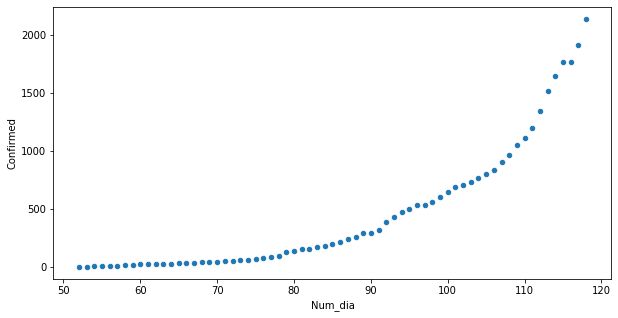

In [44]:
data_gua.plot(kind='scatter',x='Num_dia',y='Confirmed', figsize=(10,5))

C:\Users\alvar\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


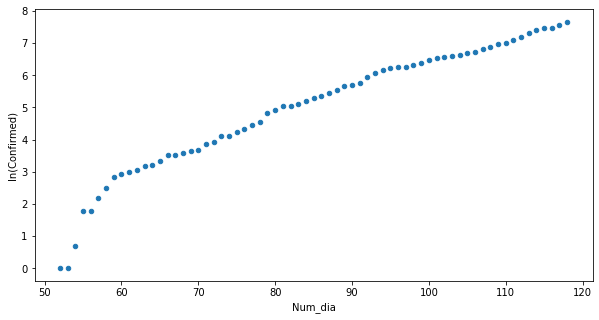

In [47]:
data_gua["ln(Confirmed)"] = np.log(data_gua["Confirmed"])
data_gua.plot(kind='scatter',x='Num_dia',y='ln(Confirmed)', figsize=(10,5))

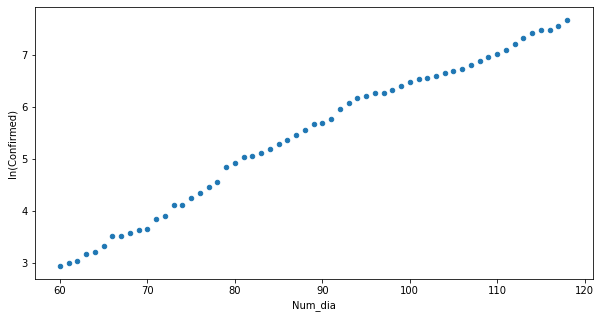

In [49]:
data_gua = data_gua[data_gua['Num_dia'] >= 60]
data_gua.plot(kind='scatter',x='Num_dia',y='ln(Confirmed)', figsize=(10,5))

In [56]:
data_gua['Num_dia'] = list(range(0, len(data_gua)))
data_gua.reset_index(drop = True, inplace=True)
data_gua

,Country/Region,Date,Confirmed,Deaths,Recovered,Num_dia,ln(Confirmed)
0,Guatemala,3/22/20,19,1,0,0,2.944439
1,Guatemala,3/23/20,20,1,0,1,2.995732
2,Guatemala,3/24/20,21,1,0,2,3.044522
3,Guatemala,3/25/20,24,1,4,3,3.178054
4,Guatemala,3/26/20,25,1,4,4,3.218876
5,Guatemala,3/27/20,28,1,4,5,3.332205
6,Guatemala,3/28/20,34,1,10,6,3.526361
7,Guatemala,3/29/20,34,1,10,7,3.526361
8,Guatemala,3/30/20,36,1,10,8,3.583519
9,Guatemala,3/31/20,38,1,12,9,3.637586


In [65]:
#Funcion de error o de costo del modelo

def error(y_real,y_aprox):
    return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox) )

x = data_gua["Num_dia"].values
y = data_gua["ln(Confirmed)"].values
print(x, "\n", y, "\n", type(x), type(y))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58] 
 [2.94443898 2.99573227 3.04452244 3.17805383 3.21887582 3.33220451
 3.52636052 3.52636052 3.58351894 3.63758616 3.66356165 3.8501476
 3.91202301 4.11087386 4.11087386 4.24849524 4.34380542 4.46590812
 4.55387689 4.83628191 4.91998093 5.04342512 5.04985601 5.11799381
 5.19295685 5.27811466 5.36597602 5.45958551 5.54907608 5.66642669
 5.68357977 5.75574221 5.95064255 6.06378521 6.15909539 6.2146081
 6.27287701 6.27287701 6.32256524 6.3952616  6.46769873 6.53378884
 6.55535689 6.59304453 6.63725803 6.6821086  6.72383244 6.80239476
 6.8741985  6.95844839 7.01571242 7.08924316 7.20191632 7.32514896
 7.40427912 7.47477218 7.47477218 7.55590509 7.66528472] 
 <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [86]:
def mod_regresion_lineal(x, y, lr, epochs, n_visualizaciones):
    #Visualizacion del entrenamiento
    plt.scatter(x,y)

    #Reinicio del grafo
    tf.reset_default_graph()

    with tf.name_scope("Hiperparametros"):
        #Hiperparametros
        learning_rate = lr
        training_epochs = epochs

    with tf.name_scope("Parametros_entrenables"):
        #Parametros entrenables del modelo iniciando en 0,0
        par_entrenables = tf.get_variable("parametros_entrenables",dtype=tf.float32, shape=[2],
                      initializer=tf.zeros_initializer())
        l_rate = tf.get_variable("l_rate",dtype=tf.float32, shape=[],
                      initializer=tf.zeros_initializer())

    with tf.name_scope("Placeholders"):
        #Datos para el modelo, tam_muesta = total de elementos que tiene el modelo 
        tensor_x = tf.placeholder(tf.float32,[len(x)],"tensor_x")
        tensor_y = tf.placeholder(tf.float32,[len(y)],"tensor_y")
        observaciones = tf.placeholder(tf.float32,[len(x), 2],"observaciones")

    with tf.name_scope("Prediccion_y-hat"):
        #Hipotesis del modelo con la ecuacion: y = mx + b
        #Predice todos los resultados de y
        prediccion = tf.linalg.matvec(observaciones, par_entrenables, name = "Calculo_prediccion")
    
    with tf.name_scope("Gradientes"):
        #Gradiente de funcion de error para m y b estimado, con y_reales y y_predecidos
        #grad = tf.gradients(error(tensor_y,prediccion) ,par_entrenables )
        gradiente = tf.gradients(error(tensor_y,prediccion),par_entrenables, name = "Calculo_gradientes")
    
    val_error = error(tensor_y,prediccion)
    
    with tf.name_scope("Val_escalares_entrenamiento"):
        #Escalares para tensorboard
        m = tf.summary.scalar(name='m', tensor=par_entrenables[0])
        b = tf.summary.scalar(name='b', tensor=par_entrenables[1])
        es_error = tf.summary.scalar(name='es_error', tensor=val_error)

    with tf.name_scope("Parametros_m_b"):
        #Acualiza los valores de la pendiente e intercepto segun Gradient Descent
        actualizacion_parametros = tf.assign(par_entrenables, tf.squeeze(par_entrenables - (l_rate * gradiente)),
                                         name = "Actualizacion_parametros")


    #Utilizando el algoritmo de batch gradient descent
    #Crea una sesion
    with tf.train.MonitoredSession() as session:
        #Agrega las observaciones a un vextor con valores: x - 1
        np_observaciones = np.ones((len(x),2))
        #Agrega valores de x
        np_observaciones[:,0] = x
        
        #Diccionario de entrada con valores de X y Y del modelo
        #Envia todo el set de datos al modelo
        feed_dict = {tensor_x:x, tensor_y:y, observaciones:np_observaciones, l_rate:learning_rate}
        
        #Logs con TensorBoard
        now = datetime.now()
        fecha_hora = now.strftime("%Y%m%d-%H%M%S")
        #String de configuración para cada experimento
        path = "./logs/"+fecha_hora + "_lr=" + str(lr) + "_epochs=" +  str(epochs)
        print("String experimento:", path)
        
        #Imprime grafo en TensorBoard
        writer = tf.summary.FileWriter(path, session.graph)

        #Interacion por cada epoch, segun fue definido
        for i in range(training_epochs):

            #Imprime los valores del error cada cierta cantidad de interaciones
            if (i) % n_visualizaciones == 0: 
                #Derivada parcial del error respecto a m y b
                session.run(gradiente,feed_dict=feed_dict)
                s = session.run(par_entrenables,feed_dict=feed_dict)
                print("Ejecucion:", i, "Gradiente del error respecto de m y b:", s, 
                      "error: ", session.run(val_error,feed_dict=feed_dict))
                
                #Agrega los valores a TensorBoard
                summary = session.run(m)
                writer.add_summary(summary, i)
                summary = session.run(b)
                writer.add_summary(summary, i)
                summary = session.run(es_error,feed_dict=feed_dict)
                writer.add_summary(summary, i)
            else:
                session.run(gradiente,feed_dict=feed_dict)

            #Actualiza a los nuevos parametros
            session.run(actualizacion_parametros,feed_dict=feed_dict)

            #Predicciones segun los nuevos parametros
            predicciones = session.run(prediccion,feed_dict=feed_dict)
            
            #Graficando los valores de X segun las nuevas predicciones de Y
            if (i) % n_visualizaciones == 0: 
                plt.plot(x,predicciones,label=str(i))
        
        #Valores finales de grafica
        plt.plot(x,predicciones,label=str(i))
        #Parametros finales de m y b
        s = session.run(par_entrenables,feed_dict=feed_dict)
        print("Ejecucion Final:", epochs, "Gradiente del error respecto de m y b:", s, 
                      "error: ", session.run(val_error,feed_dict=feed_dict))
        
    writer.close()
    plt.show()
    return s

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
String experimento: ./logs/20200603-203710_lr=0.001_epochs=15000
Ejecucion: 0 Gradiente del error respecto de m y b: [0. 0.] error:  15.876319
Ejecucion: 1000 Gradiente del error respecto de m y b: [0.14316545 0.69622135] error:  0.7322432
Ejecucion: 2000 Gradiente del error respecto de m y b: [0.12942815 1.2318548 ] error:  0.44361916
Ejecucion: 3000 Gradiente del error respecto de m y b: [0.11879653 1.6463943 ] error:  0.27074423
Ejecucion: 4000 Gradiente del error respecto de m y b: [0.11056834 1.9672203 ] error:  0.16719723
Ejecucion: 5000 Gradiente del error respecto de m y b: [0.10420026 2.2155197 ] error:  0.1051754
Ejecucion: 6000 Gradiente del error respecto de m y b: [0.09927188 2.407683  ] error:  0.06802698
Ejecucion: 7000 Gradiente del error respecto de m y b: [0.09545761 2.5564055 ] error:  0.04577606
Ejecucion: 8000 Gradiente del error respecto de m y b

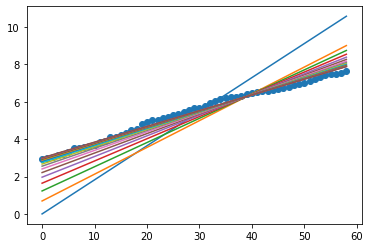

In [90]:
m, b = mod_regresion_lineal(x, y, 0.001, 15000, 1000)

## Prediccion de nuevos casos

In [118]:
print("Usando los valores m:", m, "b:",b)

start_date = date(2020, 5, 20)
end_date = date(2020, 6, 6)
delta = timedelta(days = 1)

m_dia = data_gua["Num_dia"].max(axis = 0) +1

while start_date <= end_date:
    print ("Dia:", m_dia, "fecha:",start_date.strftime("%d-%m-%Y"),
          "Prediccion numero de confirmados:", int(np.around(np.exp(m*m_dia + b))))
    start_date += delta
    m_dia += 1

Usando los valores m: 0.08408064 b: 3.0000072
Dia: 59 fecha: 20-05-2020 Prediccion numero de confirmados: 2866
Dia: 60 fecha: 21-05-2020 Prediccion numero de confirmados: 3118
Dia: 61 fecha: 22-05-2020 Prediccion numero de confirmados: 3391
Dia: 62 fecha: 23-05-2020 Prediccion numero de confirmados: 3689
Dia: 63 fecha: 24-05-2020 Prediccion numero de confirmados: 4012
Dia: 64 fecha: 25-05-2020 Prediccion numero de confirmados: 4364
Dia: 65 fecha: 26-05-2020 Prediccion numero de confirmados: 4747
Dia: 66 fecha: 27-05-2020 Prediccion numero de confirmados: 5163
Dia: 67 fecha: 28-05-2020 Prediccion numero de confirmados: 5616
Dia: 68 fecha: 29-05-2020 Prediccion numero de confirmados: 6109
Dia: 69 fecha: 30-05-2020 Prediccion numero de confirmados: 6645
Dia: 70 fecha: 31-05-2020 Prediccion numero de confirmados: 7228
Dia: 71 fecha: 01-06-2020 Prediccion numero de confirmados: 7861
Dia: 72 fecha: 02-06-2020 Prediccion numero de confirmados: 8551
Dia: 73 fecha: 03-06-2020 Prediccion numero 

### Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [4]:
data = pd.read_csv('winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
def graf_correlacion_x_y(val_x, val_y, data_set):
    coef_correlacion = np.corrcoef(data_set[val_x], data_set[val_y])[1,0]
    print("Coeficiente de correlacion:", coef_correlacion)
    titulo = "Correlacion entre " + val_x + " y " + val_y + str(" %.2f" % round(coef_correlacion, 2))
    ax = sns.lineplot(x=val_x, y=val_y, data=data_set)#.set_title(titulo)

Coeficiente de correlacion: 0.12405164911322429


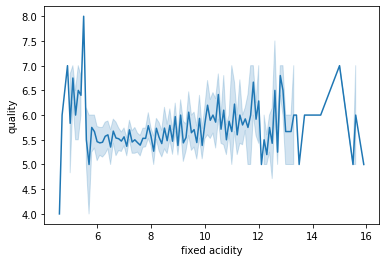

In [36]:
graf_correlacion_x_y("fixed acidity", "quality", data)

Coeficiente de correlacion: -0.390557780264007


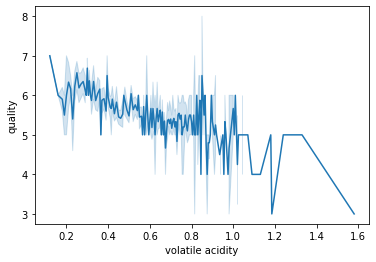

In [37]:
graf_correlacion_x_y("volatile acidity", "quality", data)

Coeficiente de correlacion: 0.22637251431804142


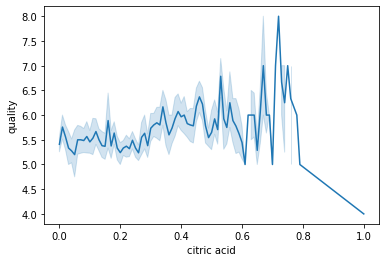

In [38]:
graf_correlacion_x_y("citric acid", "quality", data)

Coeficiente de correlacion: 0.013731637340066305


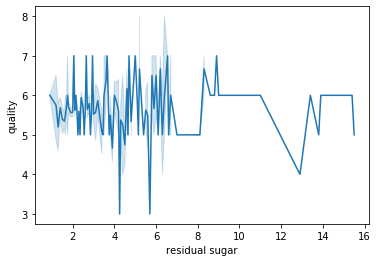

In [39]:
graf_correlacion_x_y("residual sugar", "quality", data)

Coeficiente de correlacion: -0.12890655993005276


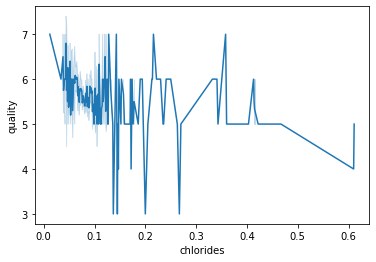

In [40]:
graf_correlacion_x_y("chlorides", "quality", data)

Coeficiente de correlacion: -0.050656057244276305


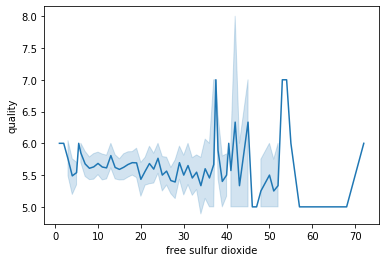

In [41]:
graf_correlacion_x_y("free sulfur dioxide", "quality", data)

Coeficiente de correlacion: -0.1851002889265378


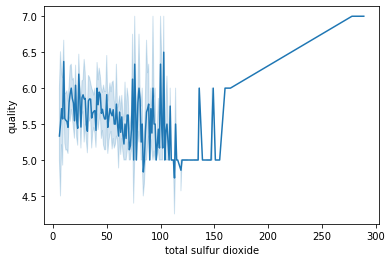

In [42]:
graf_correlacion_x_y("total sulfur dioxide", "quality", data)

Coeficiente de correlacion: -0.17491922778334879


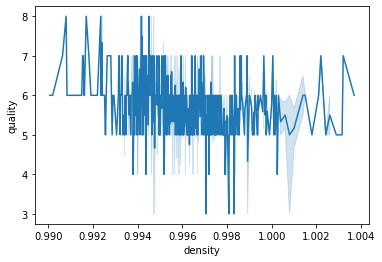

In [43]:
graf_correlacion_x_y("density", "quality", data)

Coeficiente de correlacion: -0.057731391205382156


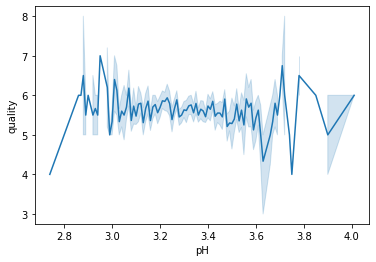

In [44]:
graf_correlacion_x_y("pH", "quality", data)

Coeficiente de correlacion: 0.2513970790692613


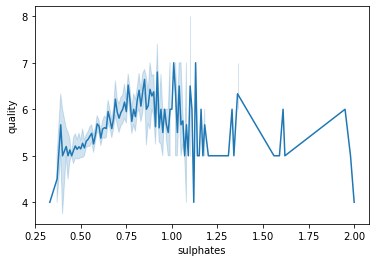

In [45]:
graf_correlacion_x_y("sulphates", "quality", data)

Coeficiente de correlacion: 0.4761663240011359


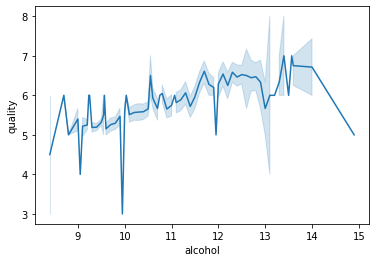

In [46]:
graf_correlacion_x_y("alcohol", "quality", data)

fixed acidity
Coeficiente de correlacion: 0.12405164911322429
volatile acidity
Coeficiente de correlacion: -0.390557780264007
citric acid
Coeficiente de correlacion: 0.22637251431804142
residual sugar
Coeficiente de correlacion: 0.013731637340066305
chlorides
Coeficiente de correlacion: -0.12890655993005276
free sulfur dioxide
Coeficiente de correlacion: -0.050656057244276305
total sulfur dioxide
Coeficiente de correlacion: -0.1851002889265378
density
Coeficiente de correlacion: -0.17491922778334879
pH
Coeficiente de correlacion: -0.057731391205382156
sulphates
Coeficiente de correlacion: 0.2513970790692613
alcohol
Coeficiente de correlacion: 0.4761663240011359


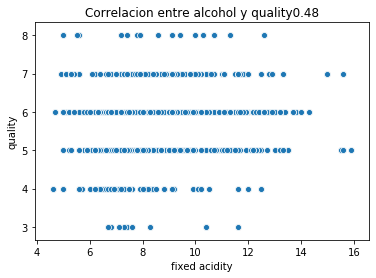

In [179]:
for col in (data.iloc[:, 0:11].columns):
    print(col)
    graf_correlacion_x_y(col, "quality", data)

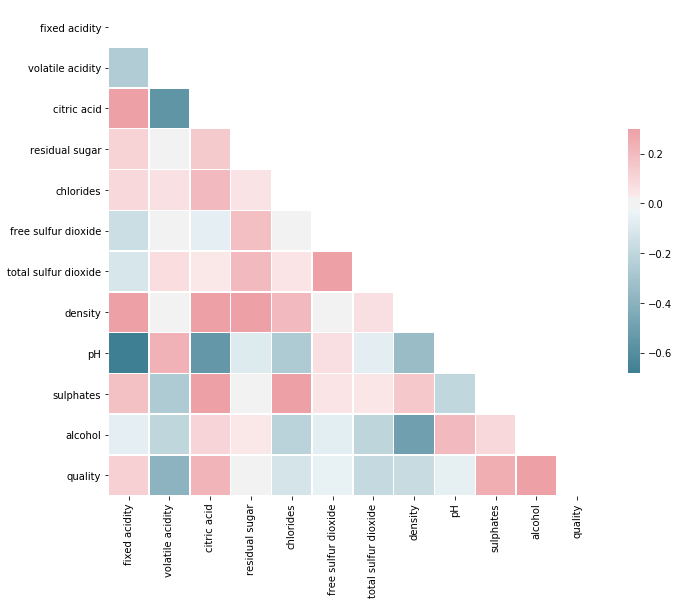

In [180]:
#Matris de correlacion entre variables
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

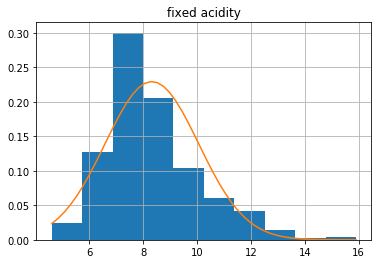

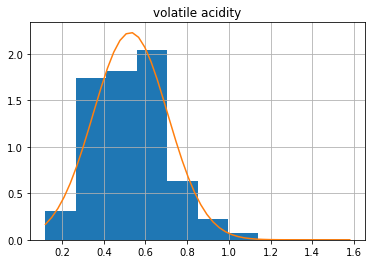

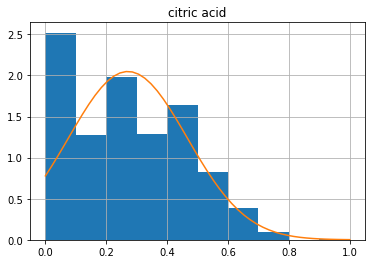

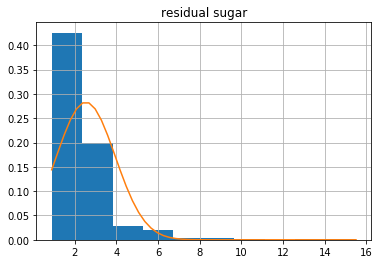

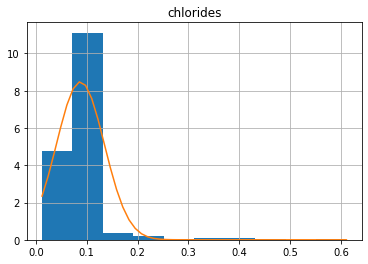

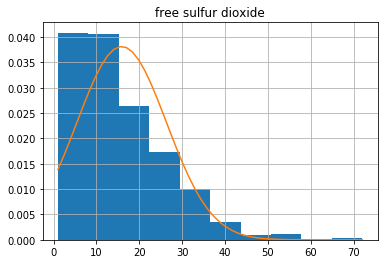

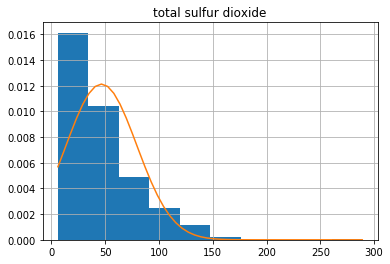

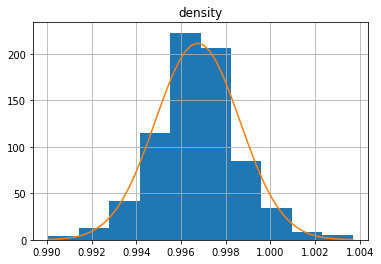

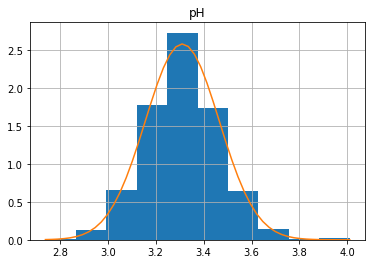

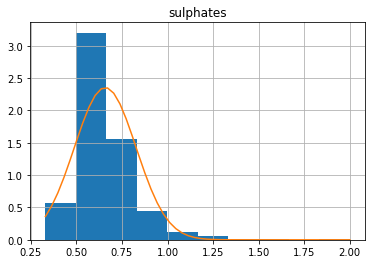

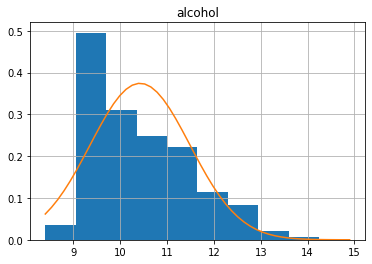

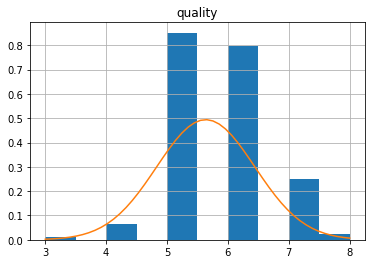

In [141]:
for col in data.columns:
    data.loc[:, col].hist(density = True)
    norm_fit = norm.fit(data.loc[:, col])
    norm_dist_fitted = norm(*norm_fit)
    plt.title(col)

    data_range = data.loc[:, col].min(),data.loc[:, col].max()
    data_values =  np.linspace(*data_range)
    plt.plot(data_values,norm_dist_fitted.pdf(data_values))
    plt.show()

In [8]:
data.loc[: , ['sulphates', 'alcohol']]
#print(data)
variables = np.array(data.loc[: , ['sulphates', 'alcohol']])
print(variables)
poly = PolynomialFeatures(2)
poly.fit_transform(variables)
print(poly.fit_transform(variables))
#[1, a, b, a^2, ab, b^2]

[[ 0.56  9.4 ]
 [ 0.68  9.8 ]
 [ 0.65  9.8 ]
 ...
 [ 0.75 11.  ]
 [ 0.71 10.2 ]
 [ 0.66 11.  ]]
[[  1.       0.56     9.4      0.3136   5.264   88.36  ]
 [  1.       0.68     9.8      0.4624   6.664   96.04  ]
 [  1.       0.65     9.8      0.4225   6.37    96.04  ]
 ...
 [  1.       0.75    11.       0.5625   8.25   121.    ]
 [  1.       0.71    10.2      0.5041   7.242  104.04  ]
 [  1.       0.66    11.       0.4356   7.26   121.    ]]


In [18]:
#Seleccion y transformacion de variables desde dataframe

def sel_variables(nombre_x1, nombre_x2, nombre_y, data):
    variables = np.array(data.loc[: , [nombre_x1, nombre_x2]])
    #print(variables)
    poly = PolynomialFeatures(2)
    poly.fit_transform(variables)
    #print(poly.fit_transform(variables))

    x = poly.fit_transform(variables)
    #print("X:\n",x)
    y = np.array(data.loc[: , [nombre_y]])
    #print("Y:\n",y)
    #print(x.shape[0], x.shape[1], len(x), y.shape)
    return x, y

In [14]:
#Funcion de error o de costo del modelo

def error(y_real,y_aprox):
    return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox) )

In [15]:
#Funcion de regresion lineal polinomial
def poli_regresion_lineal(x, y, lr, epochs, n_visualizaciones):

    #Reinicio del grafo
    tf.reset_default_graph()

    with tf.name_scope("Hiperparametros"):
        #Hiperparametros
        learning_rate = lr
        training_epochs = epochs

    with tf.name_scope("Parametros_entrenables"):
        #Parametros entrenables del modelo iniciando en 0,0
        par_entrenables = tf.get_variable("parametros_entrenables",dtype=tf.float32, shape=[x.shape[1]],
                      initializer=tf.zeros_initializer())
        l_rate = tf.get_variable("l_rate",dtype=tf.float32, shape=[],
                      initializer=tf.zeros_initializer())

    with tf.name_scope("Placeholders"):
        #Datos para el modelo, tam_muesta = total de elementos que tiene el modelo 
        tensor_x = tf.placeholder(tf.float32,[x.shape[0], x.shape[1]],"tensor_x")
        tensor_y = tf.placeholder(tf.float32,[y.shape[0], y.shape[1]],"tensor_y")
        observaciones = tf.placeholder(tf.float32,[x.shape[0], x.shape[1]],"observaciones")

    with tf.name_scope("Prediccion_y-hat"):
        #Hipotesis del modelo con la ecuacion: y = mx + b
        #Predice todos los resultados de y
        prediccion = tf.linalg.matvec(observaciones, par_entrenables, name = "Calculo_prediccion")
    
    with tf.name_scope("Gradientes"):
        #Gradiente de funcion de error para m y b estimado, con y_reales y y_predecidos
        #grad = tf.gradients(error(tensor_y,prediccion) ,par_entrenables )
        gradiente = tf.gradients(error(tensor_y,prediccion),par_entrenables, name = "Calculo_gradientes")
    
    val_error = error(tensor_y,prediccion)
    
    with tf.name_scope("Val_escalares_entrenamiento"):
        #Escalares para tensorboard
        x0 = tf.summary.scalar(name='x0', tensor=par_entrenables[0])
        x1 = tf.summary.scalar(name='x1', tensor=par_entrenables[1])
        x2 = tf.summary.scalar(name='x2', tensor=par_entrenables[2])
        x3 = tf.summary.scalar(name='x3', tensor=par_entrenables[3])
        x4 = tf.summary.scalar(name='x4', tensor=par_entrenables[4])
        x5 = tf.summary.scalar(name='x5', tensor=par_entrenables[5])
        es_error = tf.summary.scalar(name='es_error', tensor=val_error)

    with tf.name_scope("Parametros_m_b"):
        #Acualiza los valores de la pendiente e intercepto segun Gradient Descent
        actualizacion_parametros = tf.assign(par_entrenables, tf.squeeze(par_entrenables - (l_rate * gradiente)),
                                         name = "Actualizacion_parametros")


    #Utilizando el algoritmo gradient descent
    #Crea una sesion
    with tf.train.MonitoredSession() as session:
        #print("X:", x)
        #print("Y:", y)
        
        #Diccionario de entrada con valores de X y Y del modelo
        #Envia todo el set de datos al modelo
        feed_dict = {tensor_x:x, tensor_y:y, observaciones:x, l_rate:learning_rate}
        
        #Logs con TensorBoard
        now = datetime.now()
        fecha_hora = now.strftime("%Y%m%d-%H%M%S")
        #String de configuración para cada experimento
        path = "./logs/"+fecha_hora + "_lr=" + str(lr) + "_epochs=" +  str(epochs) + "_polinomio_grado=2"
        print("String experimento:", path)
        
        #Imprime grafo en TensorBoard
        writer = tf.summary.FileWriter(path, session.graph)

        #Interacion por cada epoch, segun fue definido
        for i in range(training_epochs):

            #Imprime los valores del error cada cierta cantidad de interaciones
            if (i) % n_visualizaciones == 0: 
                #Derivada parcial del error respecto a m y b
                session.run(gradiente,feed_dict=feed_dict)
                s = session.run(par_entrenables,feed_dict=feed_dict)
                print("Ejecucion:", i, "gradietnes de x:", s, 
                      "\nError: ", session.run(val_error,feed_dict=feed_dict))

            else:
                session.run(gradiente,feed_dict=feed_dict)
            
            #Agrega los valores a TensorBoard
            summary = session.run(x0)
            writer.add_summary(summary, i)
            summary = session.run(x1)
            writer.add_summary(summary, i)
            summary = session.run(x2)
            writer.add_summary(summary, i)
            summary = session.run(x3)
            writer.add_summary(summary, i)
            summary = session.run(x4)
            writer.add_summary(summary, i)
            summary = session.run(x5)
            writer.add_summary(summary, i)
            summary = session.run(es_error,feed_dict=feed_dict)
            writer.add_summary(summary, i)
            
            #Actualiza a los nuevos parametros
            session.run(actualizacion_parametros,feed_dict=feed_dict)

            #Predicciones segun los nuevos parametros
            predicciones = session.run(prediccion,feed_dict=feed_dict)
        
        #Parametros finales de m y b
        s = session.run(par_entrenables,feed_dict=feed_dict)
        e = session.run(val_error,feed_dict=feed_dict)
        print("Ejecucion Final:", epochs, "gradietnes de x:", s, 
                      "\nError: ", e)
        
    writer.close()
    return s, e

### Grafico del grafo

![title](img/grafo_poly.png)

### Pruebas de regresion polinomial 

In [19]:
x, y = sel_variables('sulphates', 'alcohol', 'quality', data)
parametros_modelo, error_modelo = poli_regresion_lineal(x, y, 0.0001, 10000, 1000)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
String experimento: ./logs/20200604-194546_lr=0.0001_epochs=10000_polinomio_grado=2
Ejecucion: 0 gradietnes de x: [0. 0. 0. 0. 0. 0.] 
Error:  16.208254
Ejecucion: 1000 gradietnes de x: [0.02251109 0.01225132 0.12300822 0.00751738 0.05324608 0.03415576] 
Error:  0.82295454
Ejecucion: 2000 gradietnes de x: [0.04150088 0.02122664 0.22487058 0.01154373 0.08305485 0.0226271 ] 
Error:  0.70397514
Ejecucion: 3000 gradietnes de x: [0.05795505 0.02804073 0.3131065  0.01337576 0.09908427 0.0132561 ] 
Error:  0.619229
Ejecucion: 4000 gradietnes de x: [0.07230585 0.03328547 0.39003214 0.01377307 0.10595383 0.00553284] 
Error:  0.5565117
Ejecucion: 5000 gradietnes de x: [ 0.08489031  0.03738161  0.45745575  0.01325777  0.10685162 -0.00091448] 
Error:  0.50879085
Ejecucion: 6000 gradietnes de x: [ 0.09597532  0.0406294   0.51680905  0.01218638  0.10396773 -0.00635922] 
Error:  0.4

In [20]:
print("El error final del modelo con las variables sulphates y alcohol es:", error_modelo)

El error final del modelo con las variables sulphates y alcohol es: 0.386799


### Grafico de error y parametros entrenables

![title](img/20200604-194546-error.png)

![title](img/20200604-194546-parametros.png)

In [21]:
x, y = sel_variables('volatile acidity', 'alcohol', 'quality', data)
parametros_modelo, error_modelo = poli_regresion_lineal(x, y, 0.0001, 12000, 1000)
print("\nEl error final del modelo con las variables volatile acidity y alcohol es:", error_modelo)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
String experimento: ./logs/20200604-195614_lr=0.0001_epochs=12000_polinomio_grado=2
Ejecucion: 0 gradietnes de x: [0. 0. 0. 0. 0. 0.] 
Error:  16.208254
Ejecucion: 1000 gradietnes de x: [0.02187941 0.01361881 0.11956601 0.00845412 0.08721803 0.03359864] 
Error:  0.7811575
Ejecucion: 2000 gradietnes de x: [0.03954177 0.02227013 0.21426632 0.01248845 0.13187659 0.02246048] 
Error:  0.66520536
Ejecucion: 3000 gradietnes de x: [0.05447483 0.02796117 0.29431236 0.01397381 0.15240347 0.01388373] 
Error:  0.59318656
Ejecucion: 4000 gradietnes de x: [0.06736929 0.03179669 0.3634034  0.01397612 0.15866683 0.00703803] 
Error:  0.54260474
Ejecucion: 5000 gradietnes de x: [0.07868258 0.03446077 0.4239912  0.01314495 0.1566988  0.00139777] 
Error:  0.5041017
Ejecucion: 6000 gradietnes de x: [ 0.08872546  0.03637771  0.47774208  0.01187375  0.15016961 -0.00337337] 
Error:  0.473453

### Grafico de error y parametros entrenables

![title](img/20200604-195614-error.png)

![title](img/20200604-195614-parametros-1.png)

In [22]:
x, y = sel_variables('citric acid', 'alcohol', 'quality', data)
parametros_modelo, error_modelo = poli_regresion_lineal(x, y, 0.0001, 12000, 1000)
print("\nEl error final del modelo con las variables citric acid y alcohol es:", error_modelo)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
String experimento: ./logs/20200604-200307_lr=0.0001_epochs=12000_polinomio_grado=2
Ejecucion: 0 gradietnes de x: [0. 0. 0. 0. 0. 0.] 
Error:  16.208254
Ejecucion: 1000 gradietnes de x: [0.02288404 0.00374474 0.12516287 0.00060564 0.00670935 0.03714834] 
Error:  0.8476771
Ejecucion: 2000 gradietnes de x: [0.04264017 0.00674291 0.23123778 0.00097985 0.009425   0.02704896] 
Error:  0.729912
Ejecucion: 3000 gradietnes de x: [0.06002173 0.00925566 0.32451624 0.0012344  0.01045914 0.01820317] 
Error:  0.63890445
Ejecucion: 4000 gradietnes de x: [0.07531664 0.01138593 0.4065493  0.00141033 0.01048664 0.01044674] 
Error:  0.5685307
Ejecucion: 5000 gradietnes de x: [0.08877729 0.0132087  0.4786977  0.00153445 0.00993635 0.00363983] 
Error:  0.51409376
Ejecucion: 6000 gradietnes de x: [ 0.10062537  0.01477983  0.5421553   0.00162429  0.00907811 -0.00233746] 
Error:  0.4719767


### Grafico de error y parametros entrenables

![title](img/20200604-200307-error.png)

![title](img/20200604-200307-parametros.png)

In [23]:
x, y = sel_variables('citric acid', 'volatile acidity', 'quality', data)
parametros_modelo, error_modelo = poli_regresion_lineal(x, y, 0.0001, 12000, 1000)
print("\nEl error final del modelo con las variables citric acid y volatile acidity es:", error_modelo)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
String experimento: ./logs/20200604-201027_lr=0.0001_epochs=12000_polinomio_grado=2
Ejecucion: 0 gradietnes de x: [0. 0. 0. 0. 0. 0.] 
Error:  16.208254
Ejecucion: 1000 gradietnes de x: [0.52402896 0.14205141 0.2760051  0.05834979 0.06474459 0.16205145] 
Error:  12.152859
Ejecucion: 2000 gradietnes de x: [0.9762302  0.26473084 0.513036   0.10869679 0.12039397 0.3004697 ] 
Error:  9.142413
Ejecucion: 3000 gradietnes de x: [1.3665472  0.37071455 0.7164943  0.1521457  0.16820614 0.41853496] 
Error:  6.9075723
Ejecucion: 4000 gradietnes de x: [1.7035434  0.46230873 0.8910354  0.18964861 0.2092652  0.51907367] 
Error:  5.248425
Ejecucion: 5000 gradietnes de x: [1.9945986  0.5415002  1.0406681  0.22202569 0.24450512 0.60452014] 
Error:  4.0165844
Ejecucion: 6000 gradietnes de x: [2.2460723  0.6099998  1.1688467  0.24998377 0.27473006 0.67697287] 
Error:  3.1019082
Ejecucion

### Grafico de error y parametros entrenables

![title](img/20200604-201027-error.png)

![title](img/20200604-201027-parametros.png)

## Conclusion

Tomando en cuenta los modelos polinomiales estudiados, el modelo con menor error fue el compuesto por las variables citric acid y alcohol, con un error minimo de 0.35882577. Y los siguientes parametros de entrenamiento:

learning rate = 0.0001 - epoch = 12000